In [1]:
import numpy as np
# importing Qiskit
from qiskit import *

# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def generate_oracle(n, type):
    oracle = QuantumCircuit(n + 1)

    if type == 'constant':
        output = np.random.randint(2)
        if output == 1:
            oracle.x(n)
            
    else: #the oracle is balanced
        for qubit in range(n):
            oracle.cx(qubit, n)

    return oracle

In [3]:
def deutsch_jozsa(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    dj_circuit.x(n) #the first qubit needs to be set to |1>
    
    #apply a Hadamard Gate to each qubit
    for qubit in range(n+1):
        dj_circuit.h(qubit)
    dj_circuit.barrier()
    
    #add the oracle
    dj_circuit += oracle
    dj_circuit.barrier()
    
    #apply Hadamard gates to the first n qubits
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.barrier()
    
    #measure first n qubits
    for index in range(n):
        dj_circuit.measure(index, index)
    
    return dj_circuit
    

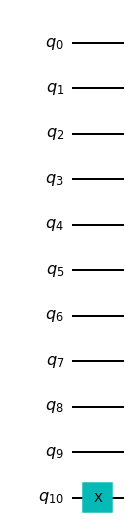

In [4]:
n = 10
oracle = generate_oracle(n, 'constant')
oracle.draw(output='mpl')

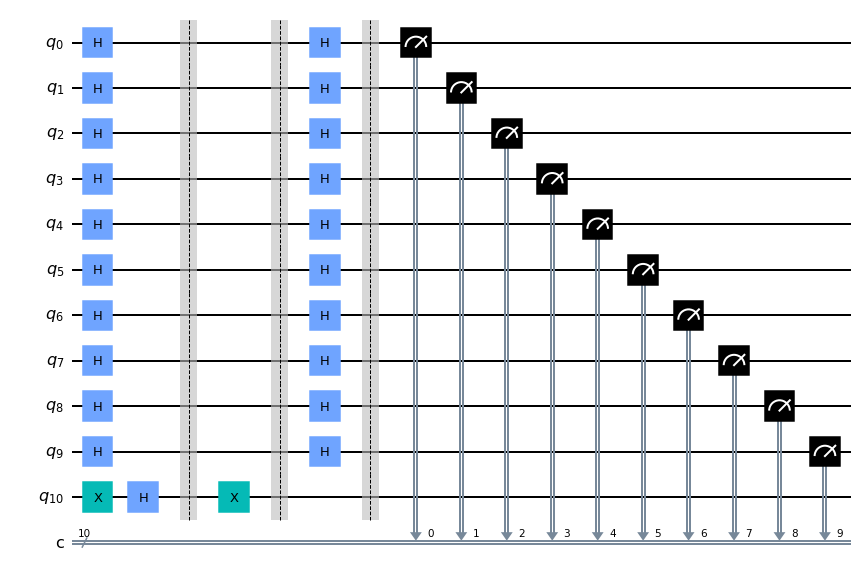

In [5]:
circuit = deutsch_jozsa(oracle, n)
circuit.draw(output='mpl')

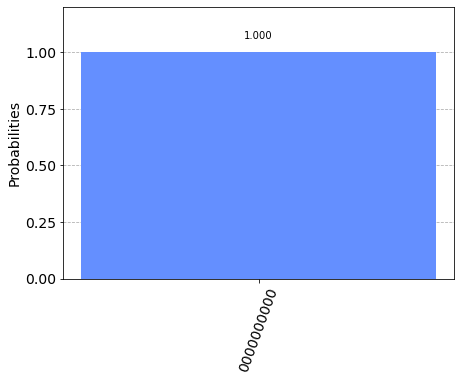

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=10000).result()
plot_histogram(result.get_counts(circuit))